In [1]:
# easyocr은 Pillow 10.0.0에서 에러남 -> 다운그레이드 필요
%pip install Pillow==9.5.0 --user

Note: you may need to restart the kernel to use updated packages.


In [2]:
# easyocr은 gpu를 사용하는데 파이토치 cuda가 되어야 함
import torch
torch.cuda.is_available()

True

In [3]:
import easyocr

In [26]:
# ocr 언어 설정
reader = easyocr.Reader(['en', 'ko'])

In [27]:
from PIL import Image
import numpy as np

image = Image.open('11.tif').convert("RGB")
image = image.resize((1000,1000), Image.ANTIALIAS)

result = reader.readtext(np.array(image))
result

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_6576\1775758196.py:5: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  image = image.resize((1000,1000), Image.ANTIALIAS)


[([[733, 19], [759, 19], [759, 31], [733, 31]], '단당', 0.25380686259435964),
 ([[794, 20], [826, 20], [826, 28], [794, 28]], '부;다', 0.012533895205034257),
 ([[857, 17], [893, 17], [893, 31], [857, 31]], '무점짐', 0.4993911215923905),
 ([[330, 94], [649, 94], [649, 136], [330, 136]],
  '수입화물선취보증신청서',
  0.9910354067417966),
 ([[314, 124], [666, 124], [666, 154], [314, 154]],
  '(Application For Letter of Guarantee)',
  0.54349237280742),
 ([[400, 144], [606, 144], [606, 174], [400, 174]],
  '수입화물대도(T/R신청',
  0.6949084974600213),
 ([[64, 186], [194, 186], [194, 210], [64, 210]],
  'KEB 하나은행 앞',
  0.9440746631398712),
 ([[71, 217], [263, 217], [263, 233], [71, 233]],
  '선박회사F(Shipping Cornparty)',
  0.15923897394328532),
 ([[495, 211], [611, 211], [611, 227], [495, 227]],
  'LIG 번호(니G No )',
  0.5241302347283453),
 ([[791, 207], [893, 207], [893, 225], [791, 225]],
  '발급임(GDate)',
  0.7496649082270546),
 ([[799, 225], [843, 225], [843, 241], [799, 241]],
  '2019',
  0.8182797173368419),
 ([[84

In [28]:
tokens = []
bboxes = []
for coord, token, conf in result:
    tokens.append(token)
    bboxes.append([coord[0][0], coord[0][1], coord[2][0], coord[2][1]])

In [29]:
from transformers import AutoModelForTokenClassification, AutoProcessor
processor = AutoProcessor.from_pretrained('nielsr/layoutlmv3-finetuned-funsd', apply_ocr=False)
model = AutoModelForTokenClassification.from_pretrained('nielsr/layoutlmv3-finetuned-funsd')

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'RobertaTokenizer'. 
The class this function is called from is 'LayoutLMv3TokenizerFast'.


In [30]:
encoding = processor(image, tokens, boxes=bboxes, truncation=True, return_tensors='pt')
for k,v in encoding.items():
  print(k,v.shape)

input_ids torch.Size([1, 512])
attention_mask torch.Size([1, 512])
bbox torch.Size([1, 512, 4])
pixel_values torch.Size([1, 3, 224, 224])


In [31]:
with torch.no_grad():
  outputs = model(**encoding)
outputs

d:\miniconda\lib\site-packages\transformers\modeling_utils.py:881: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(


TokenClassifierOutput(loss=None, logits=tensor([[[ 0.2034, -0.3972, -0.4912,  ..., -0.5179, -0.2997,  0.2921],
         [-0.7398, -0.8260, -2.0531,  ...,  0.7809, -1.1118, -1.8649],
         [-1.1181, -1.3513, -1.3516,  ...,  6.0171, -1.4528, -1.1612],
         ...,
         [ 0.2486, -1.3841, -1.9996,  ..., -2.2505,  6.9182, -1.6969],
         [ 0.8264, -2.1583, -2.0903,  ..., -1.1670, -0.7146,  6.4174],
         [ 0.1869, -0.3941, -0.5012,  ..., -0.5207, -0.2921,  0.2975]]]), hidden_states=None, attentions=None)

In [32]:
logits = outputs.logits
logits.shape

torch.Size([1, 512, 7])

In [33]:
predictions = logits.argmax(-1).squeeze().tolist()
predictions

[6,
 3,
 4,
 4,
 4,
 4,
 3,
 4,
 4,
 4,
 4,
 4,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 5,
 5,
 6,
 6,
 5,
 6,
 6,
 5,
 5,
 6,
 6,
 3,
 4,
 5,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 5,
 6,
 6,
 6,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 5,
 6,
 6,
 6,
 6,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 5,
 4,
 6,
 6,
 3,
 4,
 4,
 5,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 3,
 4,
 4,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,


In [34]:
def unnormalize_box(bbox, width, height):
     return [
         width * (bbox[0] / 1000),
         height * (bbox[1] / 1000),
         width * (bbox[2] / 1000),
         height * (bbox[3] / 1000),
     ]

token_boxes = encoding.bbox.squeeze().tolist()
width, height = image.size

true_predictions = [model.config.id2label[pred] for pred in predictions]
true_boxes = [unnormalize_box(box, width, height) for box in token_boxes]

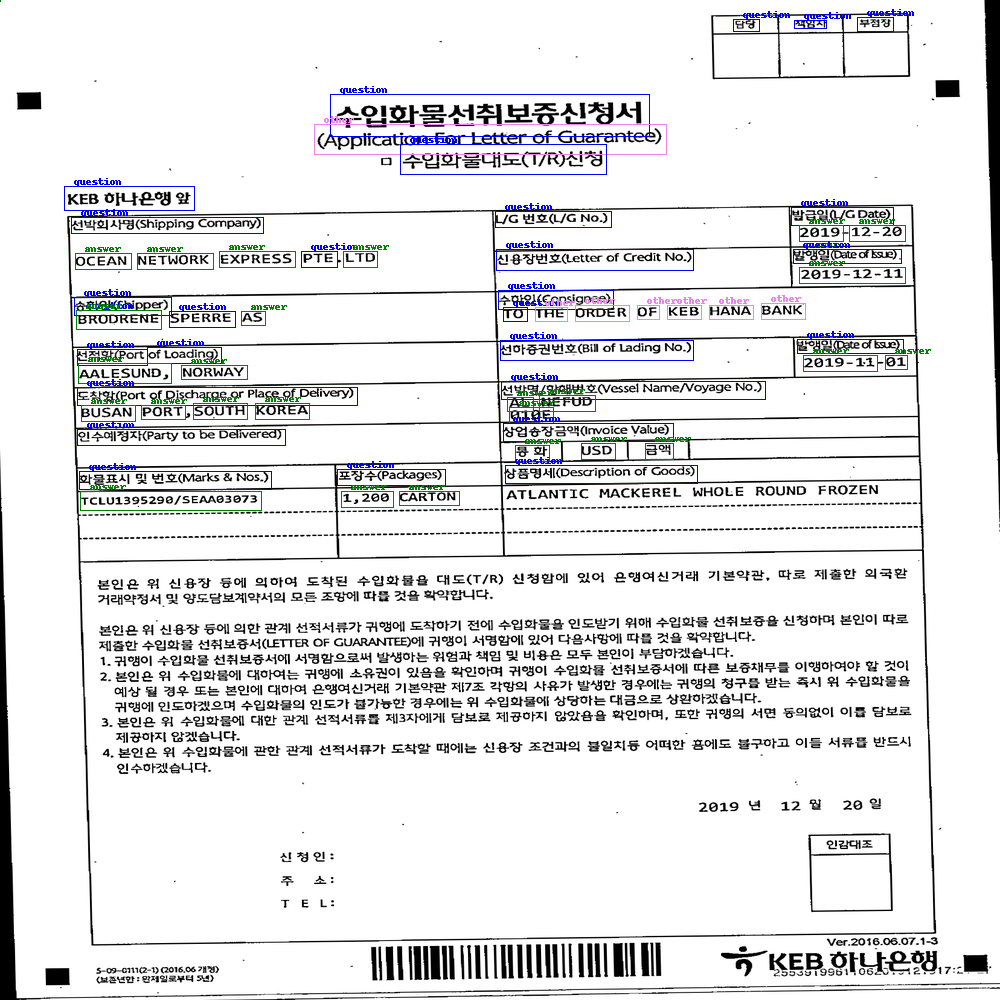

In [35]:
from PIL import ImageDraw, ImageFont

draw = ImageDraw.Draw(image)

font = ImageFont.load_default()

def iob_to_label(label):
    label = label[2:]
    if not label:
      return 'other'
    return label

label2color = {'question':'blue', 'answer':'green', 'header':'orange', 'other':'violet'}

for prediction, box in zip(true_predictions, true_boxes):
    predicted_label = iob_to_label(prediction).lower()
    draw.rectangle(box, outline=label2color[predicted_label])
    draw.text((box[0] + 10, box[1] - 10), text=predicted_label, fill=label2color[predicted_label], font=font)

image